# The Success of Kickstarters

### *Question:* What predicts the success of Kickstarter projects? 

### Cleaning & Exploring

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 30

data_dir = "/Users/Kellie/Documents/data301/proj/datasets/final/"

month_df = pd.read_csv(data_dir + "ks201901.csv").set_index("id")
month_df.head()

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,urls,usd_pledged,parent_category,category,created_at_clean,state_changed_at_clean,launched_at_clean,deadline_clean,project_duration,time_til_state_changed,avg_pledge
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1504859185,1,An eco-friendly coffee table that is both func...,US,1473631551,USD,1480966943,5000.0,1478371343,Industrial Bamboo Table,240.0,industrial-bamboo-table,False,False,failed,1480966943,"{""web"":{""project"":""https://www.kickstarter.com...",240.000000,crafts,woodworking,2016-09-11 22:05:51,2016-12-05 19:42:23,2016-11-05 18:42:23,2016-12-05 19:42:23,84 days 21:36:32.000000000,84 days 21:36:32.000000000,240.000000
49266114,3,We take digital uploads and make them handpain...,CA,1436540372,CAD,1440417634,1000.0,1437480034,"Custom Pet Portraits on Canvas- ""From Pixels t...",322.0,custom-pet-portraits-on-canvas-from-pixels-to-...,False,False,failed,1440417634,"{""web"":{""project"":""https://www.kickstarter.com...",247.950175,art,painting,2015-07-10 14:59:32,2015-08-24 12:00:34,2015-07-21 12:00:34,2015-08-24 12:00:34,44 days 21:01:02.000000000,44 days 21:01:02.000000000,82.650058
1228074690,243,We are a team of restaurant pros looking to fu...,US,1427218874,USD,1431706954,35000.0,1429114954,The Barmobile: Boston's Mobile Cocktail Cateri...,41738.0,the-barmobile-bostons-mobile-cocktail-catering...,True,True,successful,1431706954,"{""web"":{""project"":""https://www.kickstarter.com...",41738.000000,food,food trucks,2015-03-24 17:41:14,2015-05-15 16:22:34,2015-04-15 16:22:34,2015-05-15 16:22:34,51 days 22:41:20.000000000,51 days 22:41:20.000000000,171.761317
330962986,27,"Loosely-based on a Lakota legend, Grandfather ...",US,1495110632,USD,1500217383,3000.0,1496329383,Grandfather Thunder & The Night Horses,3115.0,grandfather-thunder-and-the-night-horses,True,False,successful,1500217384,"{""web"":{""project"":""https://www.kickstarter.com...",3115.000000,publishing,children's books,2017-05-18 12:30:32,2017-07-16 15:03:04,2017-06-01 15:03:03,2017-07-16 15:03:03,59 days 02:32:31.000000000,59 days 02:32:32.000000000,115.370370
1657821447,3,Save me is a feature film about a depression s...,IE,1450121921,EUR,1455328590,15000.0,1450144590,Save Me-A film to hightlight depression (Cance...,601.0,save-me-1,False,False,canceled,1455065666,"{""web"":{""project"":""https://www.kickstarter.com...",660.680598,film & video,movie theaters,2015-12-14 19:38:41,2016-02-10 00:54:26,2015-12-15 01:56:30,2016-02-13 01:56:30,60 days 06:17:49.000000000,57 days 05:15:45.000000000,220.226866


In [20]:
merged = pd.read_csv(data_dir + "ks201901-201902.csv").set_index("id")
merged.head()

,backers_count201901,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,slug,spotlight,staff_pick201901,state201901,state_changed_at201901,...,state_changed_at_clean201901,launched_at_clean,deadline_clean,project_duration201901,time_til_state_changed201901,avg_pledge201901,backers_count201902,staff_pick201902,state201902,state_changed_at201902,state_changed_at_clean201902,project_duration201902,time_til_state_changed201902,usd_pledged201902,avg_pledge201902
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1951787043,72,A flexible pack you can customise and decorate...,HK,1544434144,HKD,1548981017,25000.0,1546389017,"RAINBOW WINDOW - The Bold, Bright Backpack for...",27754.00,pin-backpack-rainbow-window-ita-bags-make100,False,False,live,1546389017,...,2019-01-02 00:30:17,2019-01-02 00:30:17,2019-02-01 00:30:17,52 days 15:01:13.000000000,22 days 15:01:13.000000000,49.211627,76,False,successful,1548981018,2019-02-01 00:30:18,4546873,4546874,3719.416000,48.939684
1145162484,1,"Somos un dúo de música urbana latina, que busc...",MX,1544666771,MXN,1549897113,250000.0,1544713113,#NosotrosSomosLosMejoresBaby,18.80,nosotrossomoslosmejoresbaby,False,False,live,1544713114,...,2018-12-13 14:58:34,2018-12-13 14:58:33,2019-02-11 14:58:33,60 days 12:52:22.000000000,0 days 12:52:23.000000000,0.931424,1,False,failed,1549897115,2019-02-11 14:58:35,5230342,5230344,0.931424,0.931424
835262605,19,A collection of Korok leaf spirit enamel pins ...,US,1545857415,USD,1549575215,800.0,1546983215,Korok Enamel Pins,296.00,korok-enamel-pins,False,False,live,1546983215,...,2019-01-08 21:33:35,2019-01-08 21:33:35,2019-02-07 21:33:35,43 days 00:43:20.000000000,13 days 00:43:20.000000000,15.578947,24,False,failed,1549575215,2019-02-07 21:33:35,3717800,3717800,406.000000,16.916667
1600105046,46,Little enamel pins of some of the cutest marin...,CA,1543126075,CAD,1549134657,1000.0,1546542657,Ocean Friend Pins,1305.29,ocean-friend-pins,False,False,live,1546542657,...,2019-01-03 19:10:57,2019-01-03 19:10:57,2019-02-02 19:10:57,69 days 13:03:02.000000000,39 days 13:03:02.000000000,20.788807,61,False,successful,1549134658,2019-02-02 19:10:58,6008582,6008583,1310.141920,21.477736
1371675865,29,Una librería para gente que sí lee. Un espacio...,MX,1546441686,MXN,1548171022,30000.0,1546875022,Invernadero 156. Make/100,16843.80,invernadero-156-make-100,False,False,live,1546875022,...,2019-01-07 15:30:22,2019-01-07 15:30:22,2019-01-22 15:30:22,20 days 00:22:16.000000000,5 days 00:22:16.000000000,29.905911,54,False,successful,1548171022,2019-01-22 15:30:22,1729336,1729336,1837.943188,34.035985


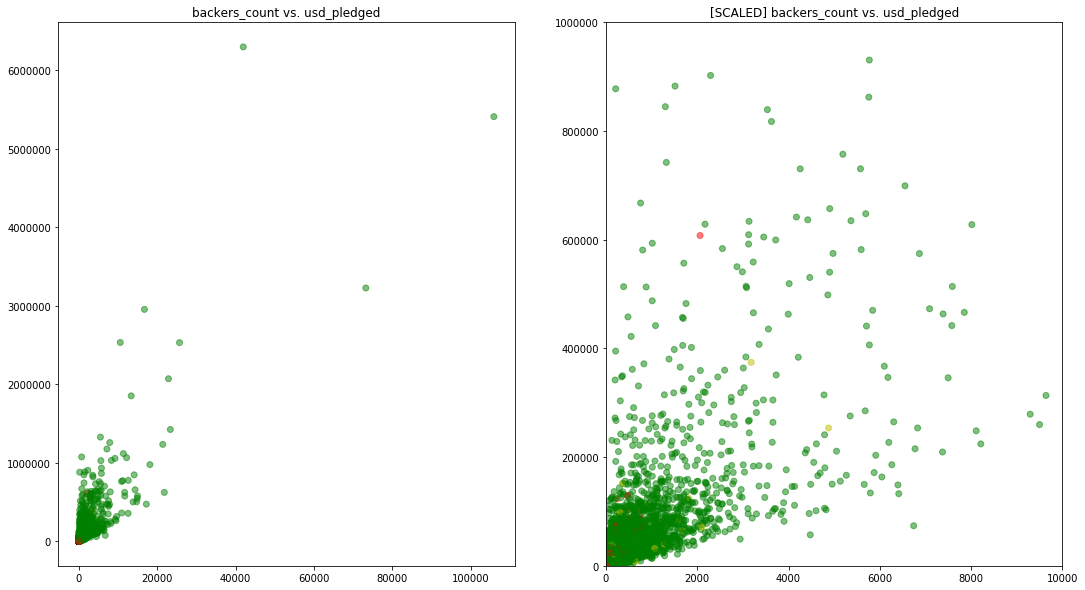

In [21]:
state_colors = month_df.state.map({
    "successful": "g",
    "failed": "r",
    "canceled": "r",
    "live": "y",
    "suspended": "r"
})

f, ax = plt.subplots(1,2,figsize=(18,10))
raw_ax = ax[0]

raw_ax.set_title("backers_count vs. usd_pledged")
raw_ax.scatter(x=month_df.backers_count, y=month_df.usd_pledged,
               c=state_colors, alpha=0.5)

scaled_ax = ax[1]
scaled_ax.set_xlim(left=0, right=10000)
scaled_ax.set_ylim(bottom=0, top=1000000)

scaled_ax.set_title("[SCALED] backers_count vs. usd_pledged")
scaled_ax.scatter(x=month_df.backers_count, y=month_df.usd_pledged,
                  c=state_colors, alpha=0.5)

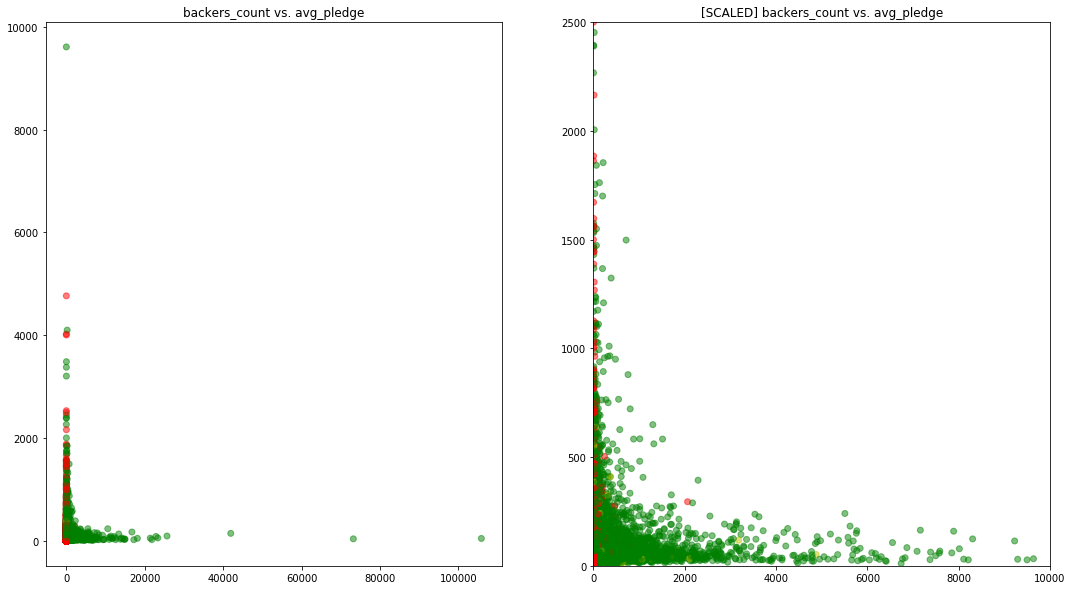

In [22]:
f, ax = plt.subplots(1,2,figsize=(18,10))

raw_ax = ax[0]
raw_ax.set_title("backers_count vs. avg_pledge")
raw_ax.scatter(x=month_df.backers_count, y=month_df.avg_pledge,
               c=state_colors, alpha=0.5)

scaled_ax = ax[1]
scaled_ax.set_xlim(left=0, right=10000)
scaled_ax.set_ylim(bottom=0, top=2500)
scaled_ax.set_title("[SCALED] backers_count vs. avg_pledge")
scaled_ax.scatter(x=month_df.backers_count, y=month_df.avg_pledge,
                  c=state_colors, alpha=0.5)

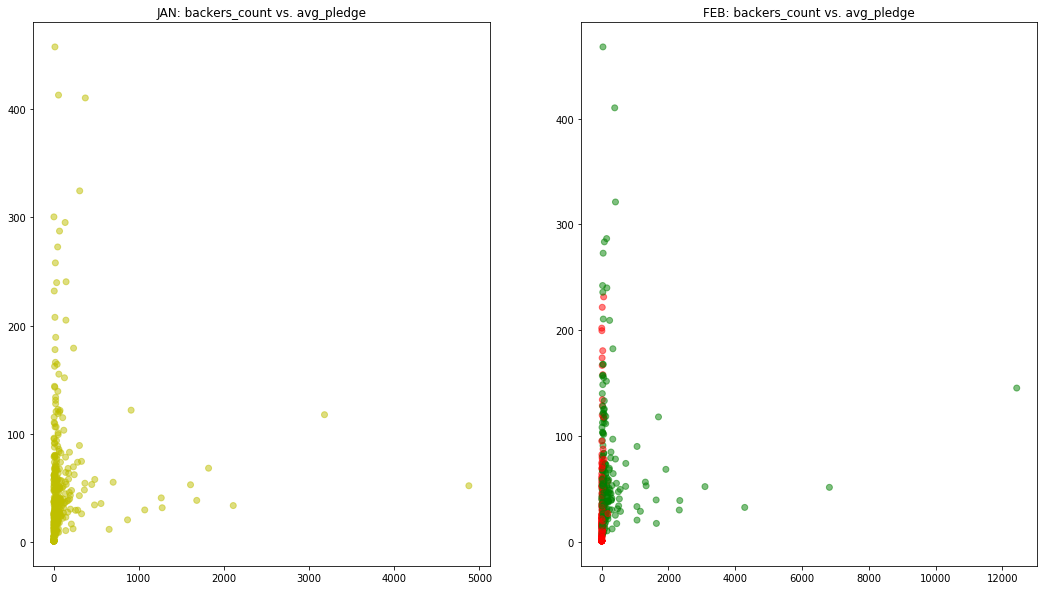

In [28]:
jan_colors = merged.state201901.map({
    "successful": "g",
    "failed": "r",
    "canceled": "r",
    "live": "y",
    "suspended": "r"
})

feb_colors = merged.state201902.map({
    "successful": "g",
    "failed": "r",
    "canceled": "r",
    "live": "y",
    "suspended": "r"
})

f, ax = plt.subplots(1,2,figsize=(18,10))

jan_ax = ax[0]
jan_ax.set_title("JAN: backers_count vs. avg_pledge")
jan_ax.scatter(x=merged.backers_count201901,
               y=merged.avg_pledge201901,
               c=jan_colors, alpha=0.5)

feb_ax = ax[1]
feb_ax.set_title("FEB: backers_count vs. avg_pledge")
feb_ax.scatter(x=merged.backers_count201902,
               y=merged.avg_pledge201902,
               c=feb_colors, alpha=0.5)